The 1-dimensional linear wave equation
======================================

The objective of this first example is to provide an overview of the coding syntax.

To understand the coding philosophy of **SCRIMP**, let us consider the 1D wave equation with Neumann boundary control as a first example
$$
    \left\lbrace
    \begin{array}{rcl}
    \rho(x) \partial_{tt}^2 w(t,x) - \partial_x \left( T(x) \partial_x w(t,x) \right) &=& 0, \qquad t \ge 0, x \in (0,1), \\
    \partial_t w(0,x) &=& v_0(x), \qquad x \in (0,1), \\
    \partial_x w(0,x) &=& s_0(x), \qquad x \in (0,1), \\
    - T(0) \partial_x \left( w(t,0) \right) &=& u_L(t), \qquad t \ge 0, \\
    T(1) \partial_x \left( w(t,1) \right) &=& u_R(t), \qquad t \ge 0,
    \end{array}
    \right.
$$
where $w$ denotes the deflection from the equilibrium position of a string, $\rho$ is its mass density and $T$ the Young's modulus. **Note** the minus sign on the control at the left end side, standing for the *outward normal* to the domain $(0,1)$.

The physics giving this equation has to be restated in the port-Hamiltonian formalism first.

Port-Hamiltonian framework
--------------------------

Let $\alpha_q := \partial_x w$ denotes the *strain* and $\alpha_p := \rho \partial_t w$ the *linear momentum*. One can express the total mechanical energy lying in the system $\mathcal{H}$, the **Hamiltonian**, as
$$
    \mathcal{H}(t) = \mathcal{H}(\alpha_q(t,x), \alpha_p(t,x)) := \underbrace{\frac{1}{2} \int_0^1 \alpha_q(t,x) T(x) \alpha_q(t,x) {\rm d}x}_{\text{Potential energy}} + \underbrace{\frac{1}{2} \int_0^1 \frac{\alpha_p(t,x)^2}{\rho(x)} {\rm d}x}_{\text{Kinetic energy}}.
$$

The variables $\alpha_q$ and $\alpha_p$ are known as the **state variables**, or in the present case since $\mathcal{H}$ represents an energy, the **energy variables**.

Computing the [variational derivative](https://en.wikipedia.org/wiki/Functional_derivative>) of $\mathcal{H}$ with respect to these variables leads to the **co-state variables**, or in our case the **co-energy variables**, *i.e.*
$$
    e_q := \delta_{\alpha_q} \mathcal{H} = T \alpha_q, \qquad e_p := \delta_{\alpha_p} \mathcal{H} = \frac{\alpha_p}{\rho},
$$
that is the *stress* and the *velocity* respectively.

Newton's second law and Schwarz's lemma give the following dynamics
$$
    \begin{pmatrix} \partial_t \alpha_q \\ \partial_t \alpha_p \end{pmatrix}
    =
    \begin{bmatrix} 0 & \partial_x \\ \partial_x & 0 \end{bmatrix}
    \begin{pmatrix} e_q \\ e_p \end{pmatrix}.
$$

Of course, trivial substitutions in this system would lead again to the initial string equation in second-order form. However, by keeping the system as is, an important structure appears. Indeed, the matrix of operators above is *formally* skew-symmetric. In other words, for all test functions :math:`f_q` and :math:`f_p` (compactly supported :math:`C^\infty` functions), one has thanks to integration by parts
$$
    \begin{pmatrix} f_q & f_p \end{pmatrix}
    \begin{bmatrix} 0 & \partial_x \\ \partial_x & 0 \end{bmatrix}
    \begin{pmatrix} f_q \\ f_p \end{pmatrix} = 0.
$$

Together with the boundary Neumann condition, and defining *collocated* Dirichlet observations, this defines a (Stokes-) **Dirac structure**, where solutions along time, *i.e.* *trajectories*, will belong.

The port-Hamiltonian system representing a (linear) vibrating string with Neumann boundary control and Dirichlet boundary observation then writes
$$
    \begin{pmatrix} \partial_t \alpha_q \\ \partial_t \alpha_p \end{pmatrix}
    =
    \begin{bmatrix} 0 & \partial_x \\ \partial_x & 0 \end{bmatrix}
    \begin{pmatrix} e_q \\ e_p \end{pmatrix},
$$
$$
    \left\lbrace
    \begin{array}{rcl}
    - e_q(t,0) &=& u_L(t), \\
    e_q(t,1) &=& u_R(t), \\
    y_L(t) &=& e_p(t,0), \\
    y_R(t) &=& e_p(t,1),
    \end{array}
    \right.
$$
$$
    \left\lbrace
    \begin{array}{rcl}
    e_q &=& T \alpha_q, \\
    e_p &=& \frac{\alpha_p}{\rho}.
    \end{array}
    \right.
$$
The two first blocks, giving in particular the dynamics, define the **Dirac structure** of the system. The third block is known as the **constitutive relations**, and is needed to ensure uniqueness of solutions.

The importance of the **Dirac structure** relies, in particular, in the fact that it encloses the **power balance** satisfied by the **Hamiltonian**. Indeed, along the trajectories, one has
$$
    \frac{\rm d}{{\rm d}t} \mathcal{H}(t) = \frac{\rm d}{{\rm d}t} \mathcal{H}(\alpha_q(t), \alpha_p(t)) = \underbrace{y_R(t) u_R(t)}_{\text{power flowing through the right}} + \underbrace{y_L(t) u_L(t)}_{\text{power flowing through the left}}.
$$

In other words, the **Dirac structure** encodes the way the system communicates with its environment. In the present example, it says that the variation of the total mechanical energy is given by the power supplied to the system at the boundaries.

Each couple $(\partial_t \alpha_q, e_q)$, $(\partial_t \alpha_p, e_p)$, $(u_L, y_L)$ and $(u_R, y_R)$ is a **port** of the port-Hamiltonian system, and is associated to a physically meaningful term in the **power balance**.

Structure-preserving discretization
-----------------------------------

The objective of a structure-preserving discretization method is to obtain a **finite-dimensional Dirac structure** that encloses a *discrete version* of the power balance. There is several ways to achieve this goal, but **SCRIMP** focuses on a particular application of the Mixed Finite Element Mehod, called the **Partitioned Finite Element Method**.

**Remark:** The 1D case does simplify the difficulties coming from the boundary terms. Indeed, here the functional spaces for the controls $u_L$, $u_R$ and the observations $y_L$, $y_R$ are nothing but $\mathbb{R}$.

Let $\varphi_q$ and $\varphi_p$ be smooth test functions, and $\delta_{mx}$ denote the Kronecker symbol. One can write the weak formulation of the **Dirac Structure** as follows
$$
    \left\lbrace
    \begin{array}{rcl}
    \int_0^1 \partial_t \alpha_q(t,x) \varphi_q(x) {\rm d}x &=& \int_0^1 \partial_x e_p(t,x) \varphi_q(x) {\rm d}x, \\
    \int_0^1 \partial_t \alpha_p(t,x) \varphi_p(x) {\rm d}x &=& \int_0^1 \partial_x e_q(t,x) \varphi_p(x) {\rm d}x, \\
    y_L(t) &=& \delta_{0x} e_p(t,x), \\
    y_R(t) &=& \delta_{1x} e_p(t,x).
    \end{array}
    \right.
$$

Integrating by parts the second line make the controls appear
$$
    \left\lbrace
    \begin{array}{rcl}
    \int_0^1 \partial_t \alpha_q(t,x) \varphi_q(x) {\rm d}x &=& \int_0^1 \partial_x e_p(t,x) \varphi_q(x) {\rm d}x, \\
    \int_0^1 \partial_t \alpha_p(t,x) \varphi_p(x) {\rm d}x &=& - \int_0^1 e_q(t,x) \partial_x \varphi_p(x) {\rm d}x + u_R(t) \varphi_p(1) + u_L(t) \varphi_p(0), \\
    y_L(t) &=& \delta_{0x} e_p(t,x), \\
    y_R(t) &=& \delta_{1x} e_p(t,x).
    \end{array}
    \right.
$$

Now, let $(\varphi_q^i)_{1 \le i \le N_q}$ and $(\varphi_p^k)_{1 \le k \le N_p}$ be two finite families of approximations for the $q$-type port and the $p$-type port respectively, typically finite element families, and write the discrete weak formulation with those families, one has for all $1 \le i \le N_q$ and all $1 \le k \le N_p$
$$
    \left\lbrace
    \begin{array}{rcl}
    \sum_{j=1}^{N_q} \int_0^1 \varphi_q^j(x) \varphi_q^i(x) {\rm d}x \, \frac{\rm d}{{\rm d}t} \alpha_q^j(t) &=& \sum_{\ell=1}^{N_p} \int_0^1 \partial_x \varphi_p^\ell(x) \varphi_q^i(x) {\rm d}x \, e_p^\ell(t), \\
    \sum_{\ell=1}^{N_p} \int_0^1 \varphi_p^\ell(x) \varphi_p^k(x) {\rm d}x \, \frac{\rm d}{{\rm d}t} \alpha_p^\ell(t) &=& - \sum_{j=1}^{N_q} \int_0^1 \varphi_q^j(x) \partial_x \varphi_p^k(x) {\rm d}x \, e_q^j(t) + u_R(t) \varphi_p^k(1) + u_L(t) \varphi_p^k(0), \\
    y_L(t) &=& \sum_{\ell=1}^{N_p} \varphi_p^\ell(0) \, e_p^\ell(t), \\
    y_R(t) &=& \sum_{\ell=1}^{N_p} \varphi_p^\ell(1) \, e_p^\ell(t),
    \end{array}
    \right.
$$
which rewrites in matrix form
$$
    \underbrace{\begin{bmatrix}
    M_q & 0 & 0 & 0 \\
    0 & M_p & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{bmatrix}}_{= M}
    \begin{pmatrix}
    \frac{\rm d}{{\rm d}t} \underline{\alpha_q}(t) \\
    \frac{\rm d}{{\rm d}t} \underline{\alpha_p}(t) \\
    - y_L(t) \\
    - y_R(t)
    \end{pmatrix}
    =
    \underbrace{\begin{bmatrix}
    0 & D & 0 & 0 \\
    -D^\top & 0 & B_L & B_R \\
    0 & -B_L^\top & 0 & 0 \\
    0 & -B_R^\top & 0 & 0
    \end{bmatrix}}_{= J}
    \begin{pmatrix}
    \underline{e_q}(t) \\
    \underline{e_p}(t) \\
    u_L(t) \\
    u_R(t)
    \end{pmatrix},
$$
where $\underline{\alpha_\star}(t) := \begin{pmatrix} \alpha_\star^1(t) & \cdots & \alpha_\star^{N_\star} \end{pmatrix}^\top$, $\underline{e_\star}(t) := \begin{pmatrix} e_\star^1(t) & \cdots & e_\star^{N_\star} \end{pmatrix}^\top$, and
$$
    (M_q)_{ij} := \int_0^1 \varphi_q^j(x) \varphi_q^i(x) {\rm d}x,
    \qquad
    (M_p)_{k\ell} := \int_0^1 \varphi_p^\ell(x) \varphi_p^k(x) {\rm d}x,
$$
$$
    (D)_{i\ell} := \int_0^1 \partial_x \varphi_p^\ell(x) \varphi_q^i(x) {\rm d}x,
    \qquad
    (B_L)_{k} := \varphi_p^k(0),
    \qquad
    (B_R)_{k} := \varphi_p^k(1).
$$

Abusing the language, the left-hand side will be called the **flow** of the **Dirac structure** in **SCRIMP**, while the right-hand side will be called the **effort**.

Now one can approximate the **constitutive relations** in those families by projection of their weak formulations
$$
    \left\lbrace
    \begin{array}{rcl}
    \int_0^1 e_q(t,x) \varphi_q(x) {\rm d}x &=& \int_0^1 T(x) \alpha_q(t,x) \varphi_q(x) {\rm d}x, \\
    \int_0^1 e_p(t,x) \varphi_p(x) {\rm d}x &=&  \int_0^1 \frac{\alpha_p(t,x)}{\rho(x)} \varphi_p(x) {\rm d}x,
    \end{array}
    \right.
$$
from which one can deduce the matrix form of the discrete weak formulation of the constitutive relation
$$
    \left\lbrace
    \begin{array}{rcl}
    M_q \underline{e_q}(t) &=& M_T \underline{\alpha_q}(t), \\
    M_p \underline{e_p}(t) &=& M_\rho \underline{\alpha_p}(t),
    \end{array}
    \right.
$$
where
$$
    (M_T)_{ij} := \int_0^1 T(x) \varphi_q^j(x) \varphi_q^i(x) {\rm d}x,
    \qquad
    (M_\rho)_{k\ell} := \int_0^1 \frac{\varphi_p^\ell(x)}{\rho(x)} \varphi_p^k(x) {\rm d}x.
$$

Finally, the **discrete Hamiltonian** $\mathcal{H}^d$ is defined as the evaluation of $\mathcal{H}$ on the approximation of the **state variables**
$$
    \mathcal{H}^d(t) := \mathcal{H}(\alpha_q^d(t,x), \alpha_p^d(t)) = \frac{1}{2} \underline{\alpha_q}(t)^\top M_T \underline{\alpha_q}(t) + \frac{1}{2} \underline{\alpha_p}(t)^\top M_\rho \underline{\alpha_p}(t). 
$$

The **discrete power balance** is then easily deduced from the above matrix formulations, thanks to the symmetry of $M$ and the skew-symmetry of $J$
$$
    \frac{\rm d}{{\rm d}t} \mathcal{H}^d(t) = y_R(t) u_R(t) + y_L(t) u_L(t).
$$

**Remark:** The discrete system that has to be solved numerically is a Differential Algebraic Equation (DAE). There exists some case (as in this example), where one can write the **co-state** formulation of the system by substituting the **constitutive relations** at the continuous level to get a more classical Ordinary Differential Equation (ODE)
$$
    \begin{bmatrix}
    \widetilde{M}_q & 0 & 0 & 0 \\
    0 & \widetilde{M}_p & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
    \end{bmatrix}
    \begin{pmatrix}
    \frac{\rm d}{{\rm d}t} \underline{e_q}(t) \\
    \frac{\rm d}{{\rm d}t} \underline{e_p}(t) \\
    - y_L(t) \\
    - y_R(t)
    \end{pmatrix}
    =
    \begin{bmatrix}
    0 & D & 0 & 0 \\
    -D^\top & 0 & B_L & B_R \\
    0 & -B_L^\top & 0 & 0 \\
    0 & -B_R^\top & 0 & 0
    \end{bmatrix}
    \begin{pmatrix}
    \underline{e_q}(t) \\
    \underline{e_p}(t) \\
    u_L(t) \\
    u_R(t)
    \end{pmatrix},
$$
where this time the mass matrices on the left-hand side are both *weighted* with respect to the physical parameters
$$
    (\widetilde{M}_q)_{ij} := \int_0^1 T^{-1}(x) \varphi_q^j(x) \varphi_q^i(x) {\rm d}x,
    \qquad
    (\widetilde{M}_p)_{k\ell} := \int_0^1 \rho(x) \varphi_p^\ell(x) \varphi_p^k(x) {\rm d}x.
$$

Coding within SCRIMP
--------------------

The following code is available in the file `wave_1D.py` of the *sandbox* folder of scrimp.

To start, import **SCRIMP** and create a *distributed port-Hamiltonian system* (DPHS) called, *e.g.*, `wave`

In [1]:
import scrimp as S
    
wave = S.DPHS("real")


A model with real unknowns has been initialized


Then, define the domain $\Omega = (0,1)$, with a mesh-size parameter $h$, and add it to the *DPHS*

In [2]:
dx = 0.025
domain = S.Domain("Interval", {"L": 1, "h": dx})
wave.set_domain(domain)


Interval (0, 1) has been meshed
Domain has been set
Domain is set and contains 1 mesh(es):
=== on mesh 0 of dim 1
* Subdomains are: {'Omega': 1}
* Boundaries are: {'Gamma_Left': 10, 'Gamma_Right': 11}
domain: Interval has been set


message from gf_mesh_get follow:
gfMesh object in dimension 1 with 41 points and 40 elements



This creates a mesh of the interval $\Omega = (0,1)$.

**Important to keep in mind**: the domain is composed of `regions`, denoted by integers. The *built-in* geometry of an interval available in the code returns 1 for the domain $\Omega$, 10 for the left-end and 11 for the right-end. Informations about available geometries and the indices of their regions can be found in the documentation or *via* the function `built_in_geometries()` available in `scrimp.utils.mesh`.

On this domain, we define two **states** and add them to the *DPHS*

In [3]:
alpha_q = S.State("q", "Strain", "scalar-field")
alpha_p = S.State("p", "Linear momentum", "scalar-field")
wave.add_state(alpha_q)
wave.add_state(alpha_p)


state: q has been added
state: p has been added


and the two associated **co-states**

In [4]:
e_q = S.CoState("e_q", "Stress", alpha_q)
e_p = S.CoState("e_p", "Velocity", alpha_p)
wave.add_costate(e_q)
wave.add_costate(e_p)



port: q has been added 
costate: e_q has been added to state: q
state: q has new costate: e_q
port: p has been added 
costate: e_p has been added to state: p
state: p has new costate: e_p


These latter calls create automatically two *non-algebraic* **ports**, named after their respective **state**. Note that we simplify the notations and do not write `alpha_q` and `alpha_p` but `q` and `p` for the sake of readability.

Finally, we create and add the two control-observation **ports** with

In [5]:
left_end = S.Control_Port("Boundary control (left)", "U_L", "Normal force", "Y_L", "Velocity", "scalar-field", region=10)
right_end = S.Control_Port("Boundary control (right)", "U_R", "Normal force", "Y_R", "Velocity", "scalar-field", region=11)
wave.add_control_port(left_end)
wave.add_control_port(right_end)



port: Boundary control (left) has been added on region 10
port: Boundary control (right) has been added on region 11


Note the *crucial* keyword `region` to restrict each port to its end. By default, it would apply everywhere.

**Syntaxic note:** although $y$ is the observation in the theory of port-Hamiltonian systems, it is also the second space variable for N-D problems. This name is thus reserved for this latter aim and forbidden in all definitions of a *DPHS*. Nevertheless, the code being case-sensitive, it is possible to name the observation `Y`. To avoid mistakes, we take the habit to always use this syntax, this is why we denoted our controls and observations with capital letters even if the problem does not occur in this 1D example.

To be able to write the discrete weak formulation of the system, one need to set four finite element families, associated to each **port**. Only two arguments are mandatory: the *name* of the port and the *degree* of the approximations.

In [6]:
V_q = S.FEM("q",1)
V_p = S.FEM("p",1)
V_L = S.FEM("Boundary control (left)", 1)
V_R = S.FEM("Boundary control (right)", 1)



This will construct a family of Lagrange finite elements (default choice) for each port, with the prescribed order. Remember that the boundary is only 2 disconnected points in this 1D case, so the only possibility for the finite element is 1 degree of freedom on each of them: Lagrange elements of order 1 is the easy way to do that.

Of course, this *FEM* must be added to the *DPHS*

In [7]:
wave.add_FEM(V_q)
wave.add_FEM(V_p)
wave.add_FEM(V_L)
wave.add_FEM(V_R)




FEM_PK(1,1) has been set for port q
FEM_PK(1,1) has been set for port p
FEM_PK(1,1) has been set for port Boundary control (left)
FEM_PK(1,1) has been set for port Boundary control (right)


message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 1 with 41 points, 40 elements and 41 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 1 with 41 points, 40 elements and 41 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 1 with 41 points, 40 elements and 41 degrees of freedom

message from gf_mesh_fem_get follow:
gfMeshFem object in dimension 1 with 41 points, 40 elements and 41 degrees of freedom



Finally, the physical parameters of the experiment have to be defined. In **SCRIMP**, a *parameter* is associated to a *port*.

In [8]:
#expr_T = "2 + 2*x*(1-x)*x*(1-x)"
#expr_T = "1 + 4*x*(1-x)"
expr_T = "2 - 4*x*(1-x)"
#expr_rho = "1 + x"
expr_rho = "3 -  2.5*x*x"
#c="0.5*(1+x*x*(x-1))"
c="2*x*(x-1)*(x-1)"

T = S.Parameter("T", "Young's modulus", "scalar-field", expr_T, "q",)
rho = S.Parameter("rho", "Mass density", "scalar-field", expr_rho, "p")
ccc = S.Parameter("c", "Mass density", "scalar-field", c, "q")
wave.add_parameter(T)
wave.add_parameter(rho)
wave.add_parameter(ccc)




T has been added to port: q
T has been set to 2 - 4*x*(1-x) in port: q
T has been initialized with the FEM of port: q
rho has been added to port: p
rho has been set to 3 -  2.5*x*x in port: p
rho has been initialized with the FEM of port: p
c has been added to port: q
c has been set to 2*x*(x-1)*(x-1) in port: q
c has been initialized with the FEM of port: q


The first argument will be **the string that can be used in forms**, the second argument is a human-readable description, the third one set the kind of the parameter, the fourth one is the mathematical expression defining the parameter, and finally the fifth argument is the *name* of the associated port.

It is now possible to write the weak forms defining the system. *Only the non-zero blocks* are mandatory. Furthermore, the place of the block is automatically determined by GetFEM. The syntax follow a simple rule: the unknown trial function `q` is automatically associated to the test function `Test_q` (note the capital T on `Test`), and so on.

Like we did for each call, the first step is to create the object, then to add it to the *DPHS*. As there is a lot of *bricks*, let us make a loop using a python *list*

In [9]:
wave.gf_model.add_macro('Tenttt(v)', 'exp(-v*v)')

bricks = [
    # M matrix, on the flow side
    S.Brick("M_q", "q * Test_q", [1], dt=True, position="flow"),
    S.Brick("M_p", "p * Test_p", [1], dt=True, position="flow"),
    S.Brick("M_Y_L", "Y_L * Test_Y_L", [10], position="flow"),
    S.Brick("M_Y_R", "Y_R * Test_Y_R", [11], position="flow"),
    
    # J matrix, on the effort side
    S.Brick("D", "Grad(e_p) * Test_q", [1], position="effort"),

    S.Brick("-D^T", "-e_q * Grad(Test_p)", [1], position="effort"),
    S.Brick("B_L", "-U_L * Test_p", [10], position="effort"),
    S.Brick("B_R", "U_R * Test_p", [11], position="effort"),

    S.Brick("-B_L^T", "e_p * Test_Y_L", [10], position="effort"),
    S.Brick("-B_R^T", "-e_p * Test_Y_R", [11], position="effort"),
    
    # Constitutive relations
    S.Brick("-M_e_q", "-e_q * Test_e_q", [1]),
    S.Brick("CR_q", "q*T * Test_e_q", [1]),
    S.Brick("CR_q2", " c*q * Test_e_q*Tenttt(q)", [1],linear=False),

    S.Brick("-M_e_p", "-e_p * Test_e_p", [1]),
    S.Brick("CR_p", "p/rho * Test_e_p", [1]),
   
    ]

for brick in bricks:
    wave.add_brick(brick)




Linear form  'q * Test_q' has been added as: flow relation on region: 1 of mesh: 0
Linear form  'p * Test_p' has been added as: flow relation on region: 1 of mesh: 0
Linear form  'Y_L * Test_Y_L' has been added as: flow relation on region: 10 of mesh: 0
Linear form  'Y_R * Test_Y_R' has been added as: flow relation on region: 11 of mesh: 0
Linear form  'Grad(e_p) * Test_q' has been added as: effort relation on region: 1 of mesh: 0
Linear form  '-e_q * Grad(Test_p)' has been added as: effort relation on region: 1 of mesh: 0
Linear form  '-U_L * Test_p' has been added as: effort relation on region: 10 of mesh: 0
Linear form  'U_R * Test_p' has been added as: effort relation on region: 11 of mesh: 0
Linear form  'e_p * Test_Y_L' has been added as: effort relation on region: 10 of mesh: 0
Linear form  '-e_p * Test_Y_R' has been added as: effort relation on region: 11 of mesh: 0
Linear form  '-e_q * Test_e_q' has been added as: constitutive relation on region: 1 of mesh: 0
Linear form  'q*T

The first argument of a *brick* is a human-readable name, the second one is the form, the third is a list (hence the [ and ]) of integers, listing all the regions where the form applies. The optional parameter `dt=True` is to inform **SCRIMP** that this block matrix will apply on the time-derivative of the unknown trial function, and finally the option parameter `position='flow'` informs **SCRIMP** that this block is a part of the *flow side* of the Dirac structure, `position='effort'` do the same for the *effort side*, and without this keyword, **SCRIMP** places the *brick* as part of the *constitutive relations*.

**Syntaxic note:** the constitutive relations have to be written under an implicit formulation $F = 0$. Keep in mind that a minus sign will often appear because of that.

The port-Hamiltonian system is now fully stated. It remains to set the controls and the initial values of the states before solving

In [10]:
expression_left = "-1*sin(1*pi*t)"
expression_right = "0"
wave.set_control("Boundary control (left)", expression_left)
wave.set_control("Boundary control (right)", expression_right)

q_init = "0*(x-1)*x*np.exp(-(x-0.5)*(x-0.5))"
p_init = "0."
wave.set_initial_value("q", q_init)
wave.set_initial_value("p", p_init)




Linear form  '-U_L*Test_U_L' has been added as: constitutive relation on region: 10 of mesh: 0
Source form  '-1*sin(1*pi*t)' has been added as: source relation on region: 10 of mesh: 0
Control port: Boundary control (left) has been set to: U_L = -1*sin(1*pi*t) on region: 10 of mesh: 0
Linear form  '-U_R*Test_U_R' has been added as: constitutive relation on region: 11 of mesh: 0
Source form  '0' has been added as: source relation on region: 11 of mesh: 0
Control port: Boundary control (right) has been set to: U_R = 0 on region: 11 of mesh: 0
q has been set
q has been initialized with: 0*(x-1)*x*np.exp(-(x-0.5)*(x-0.5))
p has been set
p has been initialized with: 0.


We can now solve the system (with default experiment parameters)

In [11]:
wave.set_time_scheme(
    t_f=12,
    dt=0.01,
)

In [12]:
wave.solve()

Simulation is starting on 1 processor(s) (total number of dofs: 168)
Starting linear mass matrix assembly...
Linear mass matrix assembly done in 0.0008573s
Starting linear stiffness matrix assembly...
Linear stiffness matrix assembly done in 0.001898s
Perform initialisation using 1 step(s) of a pseudo scheme, with timestep 0.0001, for initial value consistency
Initialisation done in 0.008101s


i=       0 t=       0 * (0s)   dt=    0.01        
i=       1 t=    0.01 * (0s)   dt=    0.01        
i=       6 t=0.0234685 * (0s)   dt=0.0053433         
i=       8 t=0.0344375 * (0s)   dt=0.00622477        
i=      10 t=0.0468771 * (0s)   dt=0.00785864        
i=      12 t=0.0573986 * (0s)   dt=0.0030979         
i=      15 t=0.0713708 * (0s)   dt=0.00613594        
i=      17 t=0.0831693 * (0s)   dt=0.0059662         
i=      19 t=0.0971776 * (0s)   dt= 0.00793          
i=      21 t=0.112335 * (0s)   dt=0.00781619        
i=      23 t=0.125777 * (0s)   dt=0.00633601        
i=      25 t= 0.14006 * (0s)   dt=0.00750288        
i=      27 t=0.154807 * (0s)   dt=0.0073016         
i=      29 t=0.169403 * (0s)   dt=0.00735747        
i=      31 t=0.184974 * (0s)   dt=0.0095012         
i=      33 t=0.203316 * (0s)   dt=0.0093213         
i=      35 t=0.219663 * (0s)   dt=0.00778394        
i=      37 t=0.237342 * (0s)   dt=0.00984593        
i=      40 t=0.252195 * (0s)   dt=0.0096570

Elapsed time: 5.717s
Steps: 1218 (13 rejected, 0 Nonlinear solver failures)
Nonlinear iterations: 1230, Linear iterations: 1230


To end, one can also add the Hamiltonian terms and plot the contribution of each port to the balance equation

Start computing the Hamiltonian
Hamiltonian has been computed in 0.1798466555774212 s
Start computing the powers (substituted ports are not automated)
Power cannot be computed for dynamic or substituted port q
Power cannot be computed for dynamic or substituted port p
Start computing the power flowing through Boundary control (left)
Power in Boundary control (left) has been computed in 0.06557541713118553 s
Start computing the power flowing through Boundary control (right)
Power in Boundary control (right) has been computed in 0.06467787176370621 s
Powers have been computed in 0.1361948475241661 s


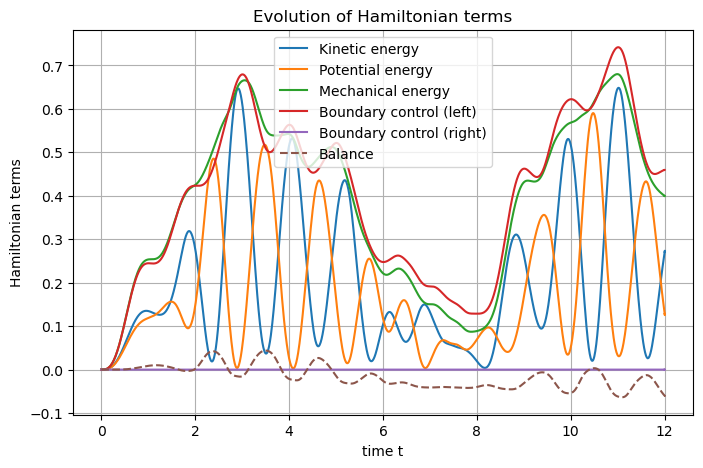

In [13]:
wave.hamiltonian.set_name("Mechanical energy")
terms = [
    S.Term("Kinetic energy", "0.5*p*p/rho", [1]),
    S.Term("Potential energy", "0.5*q*T*q", [1]),
]

for term in terms:
    wave.hamiltonian.add_term(term)

wave.plot_Hamiltonian()



#wave2.plot_Hamiltonian()

One can appreciate the *structure-preserving* property by looking at the dashed line, showing the evolution of
$$
    \mathcal{H}^d(t) - \int_0^t u_R(s) y_R(s) {\rm d}s - \int_0^t u_L(s) y_L(s) {\rm d}s.
$$

And now? Let's go to the **2D membrane** by running `Wave_2D.ipynb`!

In [14]:

import numpy as np


wave_used = wave

nt = len(wave_used.get_solution('p'))
n_point = 45
#selected_state = np.random.choice(np.array([i for i in range(1,nt-1)]),size = n_point,replace = False)
#selected_state = np.sort(np.append(selected_state,0))
selected_state = np.array([i*(nt//n_point) for i in range(0,n_point)])

#selected_state = [ 0,  3,  8, 15, 16, 17, 20, 21, 22, 23, 25, 31, 45, 49, 59, 60, 61, 62, 64, 65, 66, 69, 70, 72, 75, 76, 80, 81, 82, 88, 94]
q =wave_used.get_solution('q')[:-1]
p = wave_used.get_solution('p')[:-1]
e_q =wave_used.get_solution('e_q')[:-1]
e_p = wave_used.get_solution('e_p')[:-1]

uL = wave_used.get_solution('U_L')[:-1]
uR = wave_used.get_solution('U_R')[:-1]
yL = wave_used.get_solution('Y_L')[:-1]
yR = wave_used.get_solution('Y_R')[:-1]
t = wave_used.solution['t'][:-1]
alpha0 = np.concatenate([q[0],p[0]])

Nq = len(q[0])
Np = len(p[0])


In [15]:
print(selected_state)

[   0   26   52   78  104  130  156  182  208  234  260  286  312  338
  364  390  416  442  468  494  520  546  572  598  624  650  676  702
  728  754  780  806  832  858  884  910  936  962  988 1014 1040 1066
 1092 1118 1144]


[  0  33  66  99 132 165 198 231 264 297 330 363 396 429 462 495 528 561
 594 627 660 693 726 759 792 825 858 891 924 957]


[   0   26   52   78  104  130  156  182  208  234  260  286  312  338
  364  390  416  442  468  494  520  546  572  598  624  650  676  702
  728  754  780  806  832  858  884  910  936  962  988 1014 1040 1066
 1092 1118 1144] 45 point 12 sec



[  0  16  32  48  64  80  96 112 128 144 160 176 192 208 224 240 256 272
 288 304 320 336 352 368 384 400 416 432 448 464] True non linear 1 30 piohnt

[  0  12  24  36  48  60  72  84  96 108 120 132 144 156 168 180 192 204
 216 228 240 252 264 276 288 300 312 324 336 348 360 372 384 396 408 420
 432 444 456 468] 40 point


[   0   26   52   78  104  130  156  182  208  234  260  286  312  338
  364  390  416  442  468  494  520  546  572  598  624  650  676  702
  728  754  780  806  832  858  884  910  936  962  988 1014 1040 1066
 1092 1118 1144] 45 point 12 sec 2

In [16]:
from constitutive_relation_approximator import PFEM_GP_PHS_WAVE

PFEM_GP = PFEM_GP_PHS_WAVE(dx,0.1)

expr_T2 = "2 - 4*X*(1-X)"
expr_rho2 = "3 -  2.5*X*X"
c2="2*X*(X-1)*(X-1)"
PFEM_GP.set_rho_from_fun(expr_rho2)
PFEM_GP.set_T_from_fun(expr_T2)
PFEM_GP.set_c_from_fun(c2)



Alpha_q = np.zeros((len(selected_state),len(q[0])))
Alpha_p = np.zeros((len(selected_state),len(p[0])))

eq = np.zeros((len(selected_state),len(e_q[0])))
ep = np.zeros((len(selected_state),len(e_p[0])))


dot_Alpha_q = np.zeros((len(selected_state),len(q[0])))
dot_Alpha_p = np.zeros((len(selected_state),len(p[0])))

UL = np.zeros(len(selected_state))
UR = np.zeros(len(selected_state))
YL = np.zeros(len(selected_state))
YR = np.zeros(len(selected_state))




for i in range(len(selected_state)):
    Alpha_q[i] = q[selected_state[i]]
    Alpha_p[i] = p[selected_state[i]]

    eq[i] = e_q[selected_state[i]]
    ep[i] = e_p[selected_state[i]]

    dot_Alpha_q[i] = PFEM_GP.calculate_true_alpha_q_dot(q[selected_state[i]],p[selected_state[i]])
    dot_Alpha_p[i] = PFEM_GP.calculate_true_alpha_p_dot(q[selected_state[i]],p[selected_state[i]],uL[selected_state[i]][0],uR[selected_state[i]][0])


    UL[i] = uL[selected_state[i]][0]
    UR[i] = uR[selected_state[i]][0]

    YL[i] = yL[selected_state[i]][0]
    YR[i] = yR[selected_state[i]][0]




In [17]:

PFEM_GP.set_alpha_data(Alpha_q,Alpha_p)

PFEM_GP.set_e_data(eq,ep)




#PFEM_GP.set_y_data(YL,YR)


N_theta_q = PFEM_GP.Nq_theta
N_theta_p = PFEM_GP.Np_theta






Text(0.5, 0, '$\\alpha_q$')

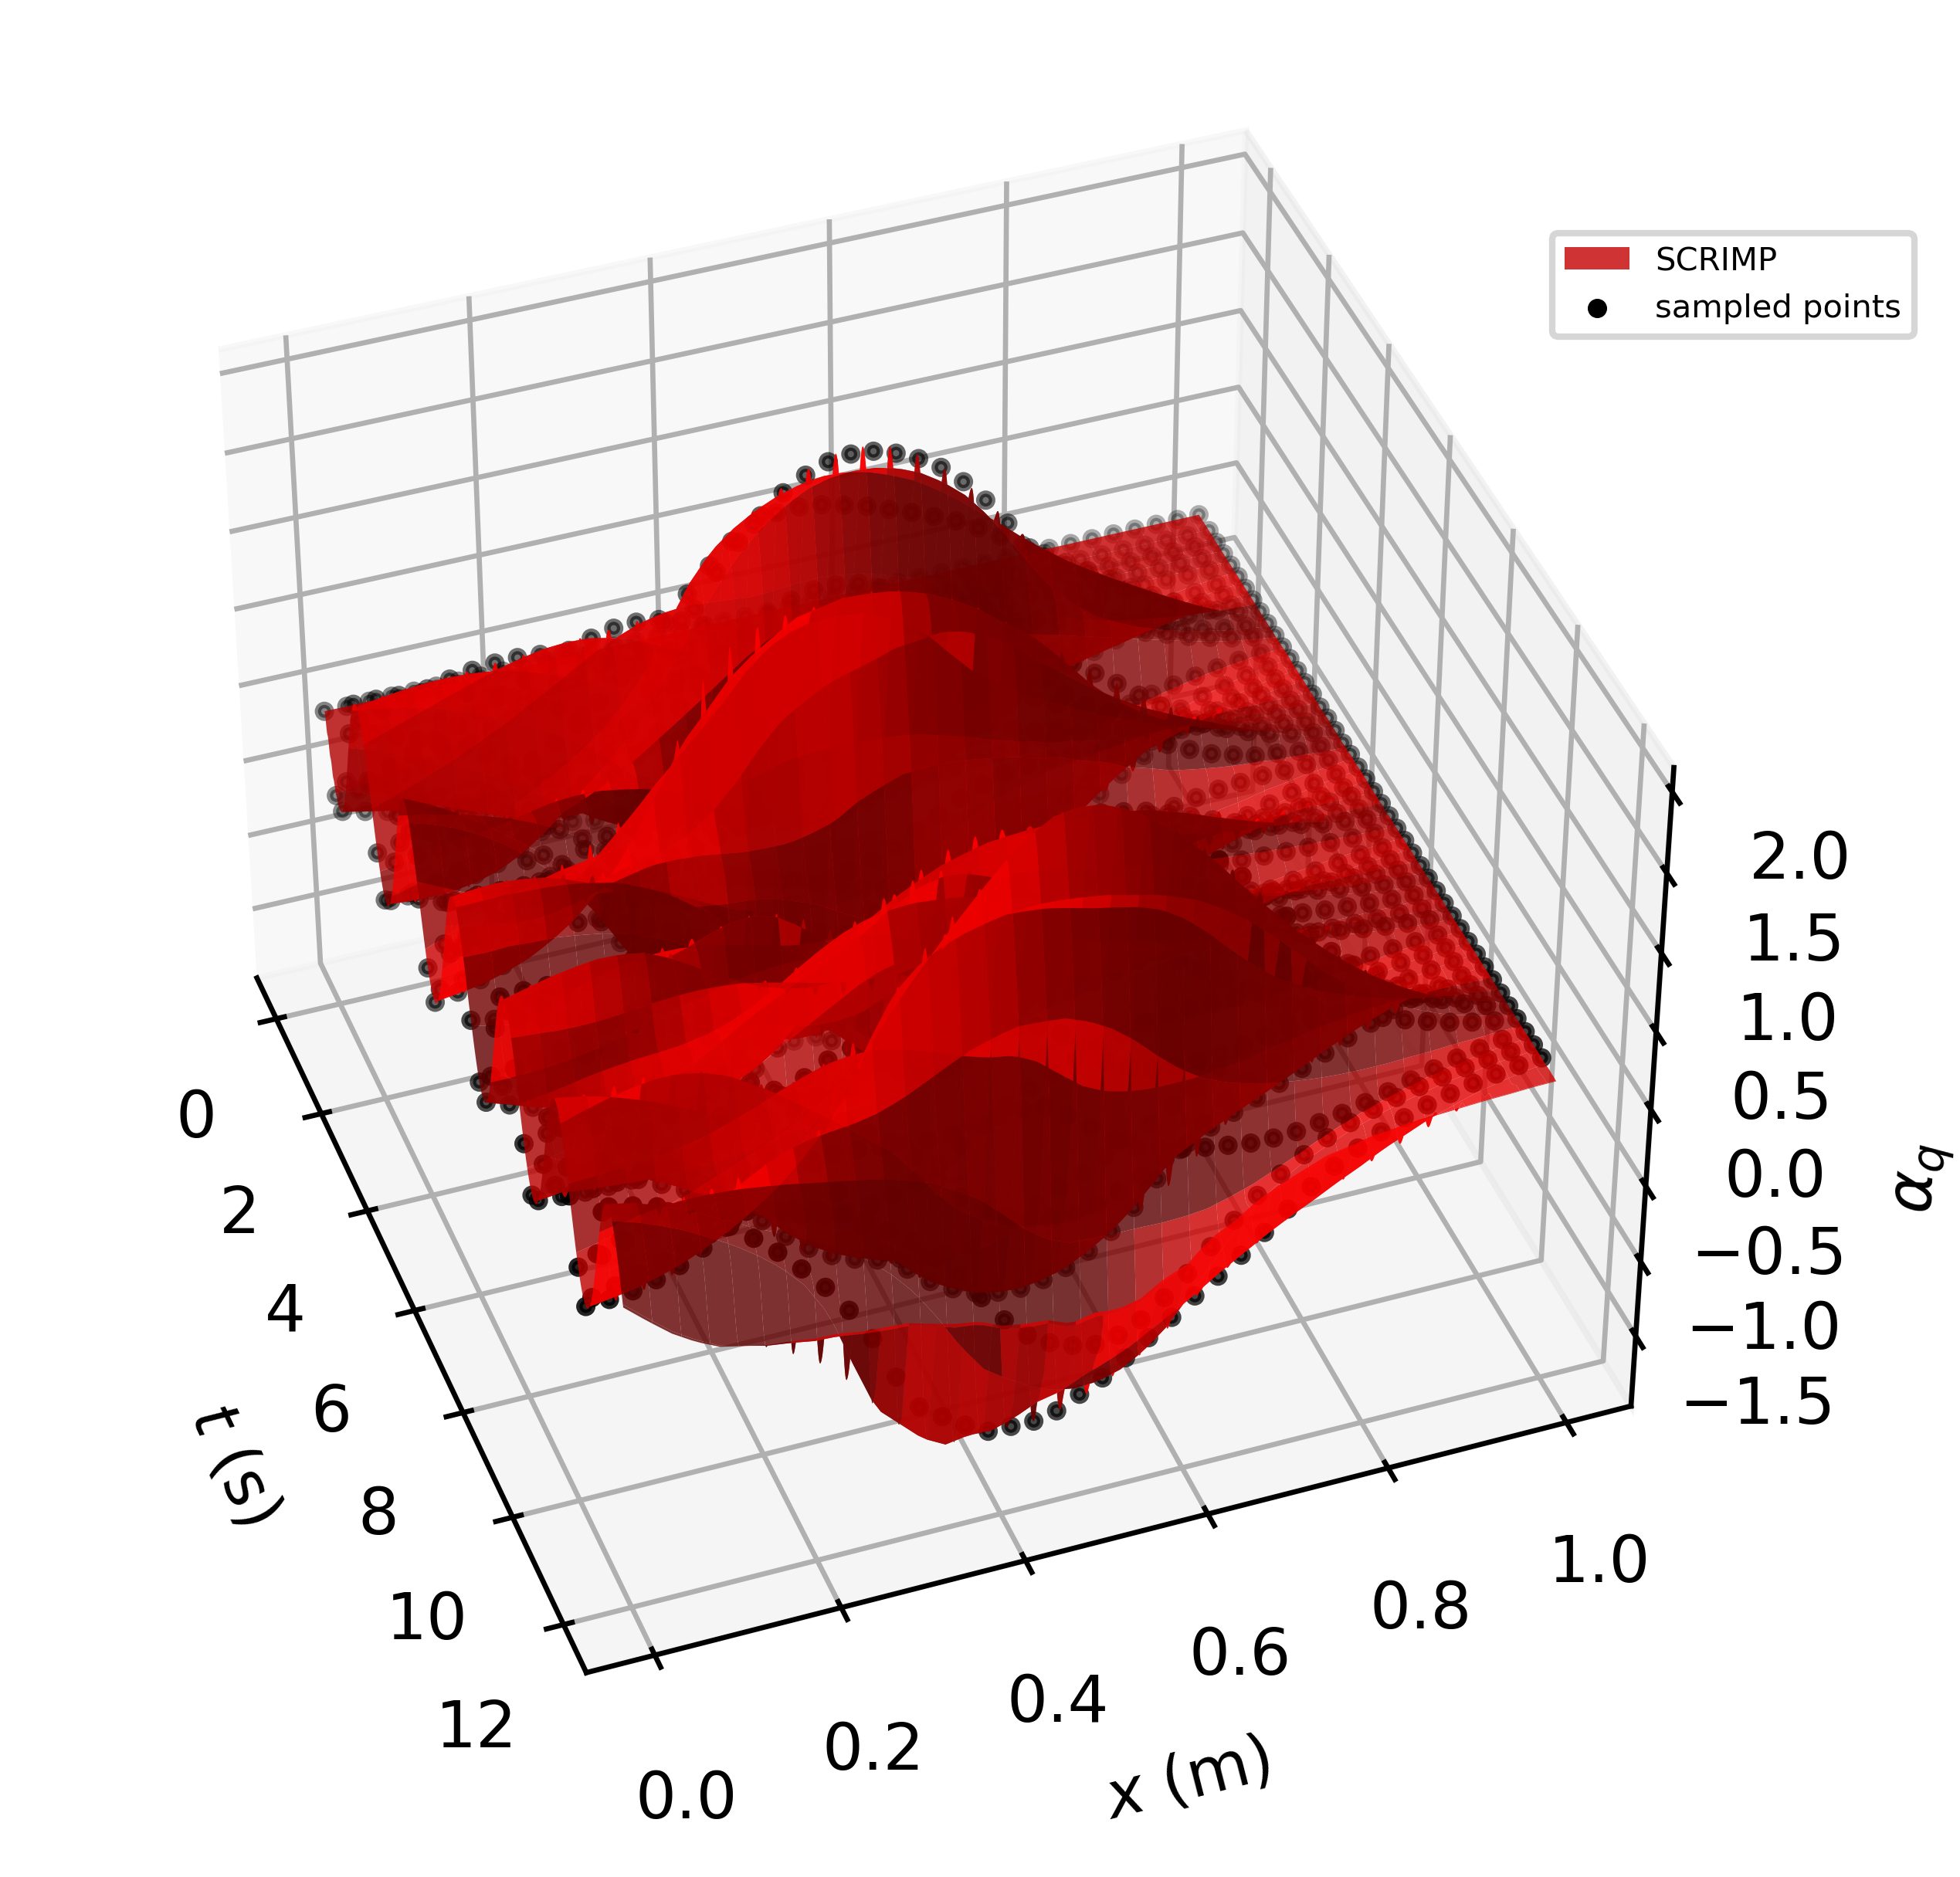

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import getfem as gf
dom = np.arange(0,1.00000001,0.01)
domp = np.arange(0,1.00000001,dx)
domq = np.arange(0,1.00000001,dx)
T_test, X_test = np.meshgrid(t,dom)
ftsize = 5
vq = gf.compute_interpolate_on(PFEM_GP.mf_q,q,dom)
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(T_test, X_test, vq.T, color='red', linewidth=1,
                                    label='SCRIMP', alpha=0.8, shade=True)

ax.view_init(elev=40, azim=-20, roll=0)
t_selected = []
for i in selected_state:
    t_selected.append(t[i])


T_point, X_point = np.meshgrid(t_selected,domq)

ax.scatter3D(T_point, X_point, Alpha_q.T,s=4, color='black', marker='o',label='sampled points')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), fontsize=ftsize)
ax.set_xlabel('$t$ (s)', fontsize=10)
ax.set_ylabel('$x$ (m)', fontsize=10)
ax.set_zlabel('$\\alpha_q$', fontsize=10)


Text(0.5, 0, '$\\alpha_p$ (kg/s)')

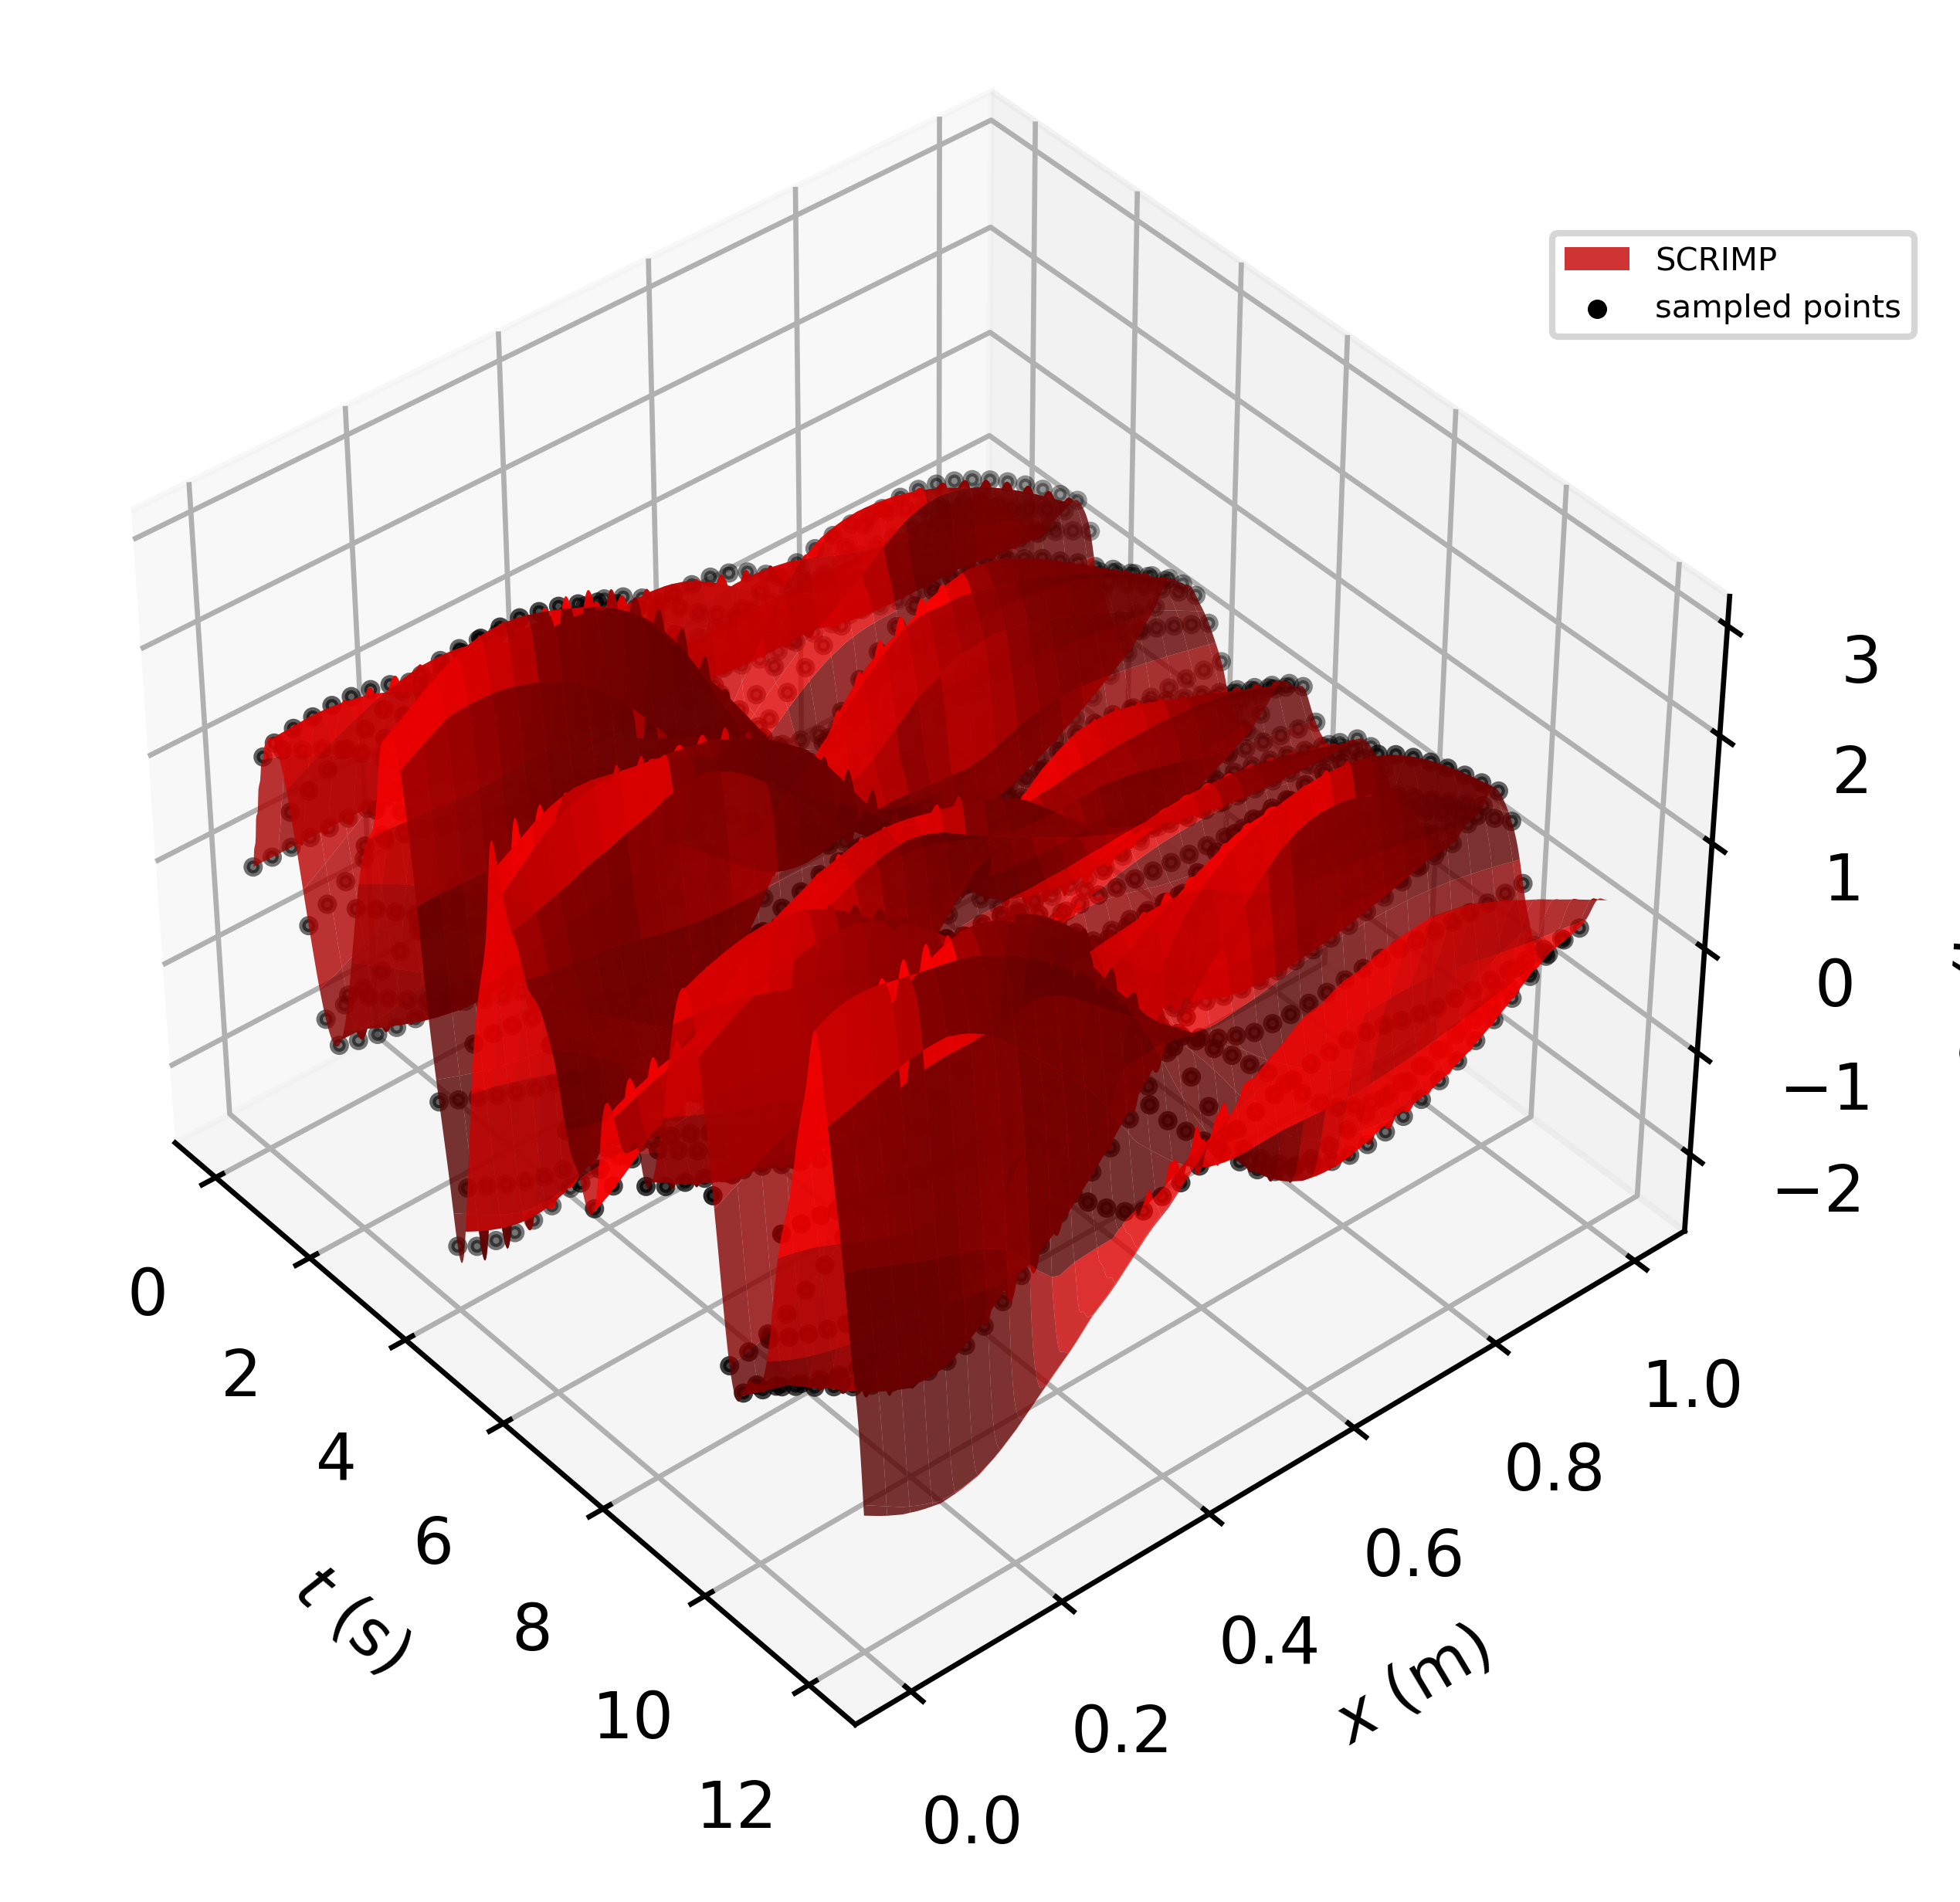

In [19]:
vp = gf.compute_interpolate_on(PFEM_GP.mf_p,p,dom)
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(T_test, X_test, vp.T, color='red', linewidth=1,
                                    label='SCRIMP', alpha=0.8, shade=True)

ax.view_init(elev=40, azim=-40, roll=0)

T_point, X_pointp = np.meshgrid(t_selected,domp)

ax.scatter3D(T_point, X_pointp, Alpha_p.T,s=4, color='black', marker='o',label='sampled points')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), fontsize=ftsize)
ax.set_xlabel('$t$ (s)', fontsize=10)
ax.set_ylabel('$x$ (m)', fontsize=10)
ax.set_zlabel('$\\alpha_p$ (kg/s)', fontsize=10)


In [20]:
#h = (np.random.rand(N_theta_q+N_theta_p+3))*10
h = np.random.rand(2*N_theta_q+2*N_theta_p+2)+1

#h[-1] = 1e-2
#h[-2] = 1e-1
# h = [ 3.35831905e-01,  2.45931215e-01, 5.32337612e-01, 1.97646837e-01,
#  2.80956541e-01,  6.05746454e-01, 2.80956541e-01, 1.97646838e-01,
#  5.32337607e-01,  2.45931202e-01,  3.35831982e-01,  2.24582126e-01,
#   2.13422243e-01,  2.04182570e-01,  1.97101696e-01,  2.00655600e-01,
#   1.72290294e-01,  2.08480016e-01,  2.05290161e-01,  2.09634582e-01,
#   2.16837220e-01,  2.28718559e-01,  5.19155407e-01,  1.00000000e-12]




#print(h)

#PFEM_GP.set_alpha_data(np.zeros((len(Alpha_q),len(Alpha_q[0]))),np.zeros((len(Alpha_p),len(Alpha_p[0]))))
#PFEM_GP.set_dot_alpha_data(np.zeros((len(dot_Alpha_q),len(dot_Alpha_q[0]))),np.zeros((len(dot_Alpha_p),len(dot_Alpha_p[0]))))
PFEM_GP.NLML(h)
print(PFEM_GP.sigma_f)

from scipy.linalg import det,cho_factor,eigvalsh
#print(eigvalsh(PFEM_GP.K))

#print(det(PFEM_GP.K[:24,:24]))


import scipy.optimize as sp

print(sp.approx_fprime(h,PFEM_GP.NLML))
print(PFEM_GP.grad_NLML(h))

#[(0,2) for i in range(0*N_theta_q+0*N_theta_p)]
bound = np.concatenate(([(0,10) for i in range(N_theta_q+N_theta_p)],[(-10,10) for i in range(N_theta_q+N_theta_p)],[(1e-12,1e+12),(0,1e+12)]))
upper_bound = np.array([bound[i][1] for i in range(len(bound))])
lower_bound = np.array([bound[i][0] for i in range(len(bound))])
# f = np.inf
# while f is np.inf:
#     h = np.random.rand(len(bound))*(upper_bound-lower_bound)+lower_bound
#     f = PFEM_GP.NLML(h)


#print(eigvalsh(PFEM_GP.K))
        


3621.9750814772615
1.3111919952791449
3621.9750814772615
3621.97508147724
3621.975081477235
3621.975081477248
3621.9750814772474
3621.975081477521
3621.9750814778063
3621.97508147746
3621.975081477357
3621.9750814772733
3621.975081477258
3621.9750814772615
3621.9750814780086
3621.975081479167
3621.975081479926
3621.9750814792574
3621.975081478216
3621.9750814777644
3621.97508147775
3621.9750814778026
3621.975081477581
3621.9750814773943
3621.97508147725
3621.9750815124353
3621.975081547614
3621.975081557176
3621.97508155568
3621.9750815480156
3621.9750815429056
3621.975081540326
3621.975081547088
3621.9750815507923
3621.975081540145
3621.9750815137113
3621.9750815179664
3621.9750815488437
3621.9750815518696
3621.9750815516863
3621.9750815575544
3621.975081543481
3621.9750815458874
3621.975081552866
3621.975081554822
3621.9750815415173
3621.975081510321
3621.975082199194
3621.9751058092547
[-1.43432617e-03 -1.77001953e-03 -9.15527344e-04 -9.46044922e-04
  1.74255371e-02  3.65600586e-02 

In [21]:
print(h)

[1.95436798 1.76520405 1.75848092 1.11199313 1.28554681 1.6363044
 1.10505077 1.67196796 1.79062534 1.26330562 1.1524867  1.35141171
 1.0205769  1.77505458 1.51252848 1.67649457 1.8149474  1.41316873
 1.40475919 1.15139681 1.41733888 1.23061841 1.50249613 1.41200096
 1.94341733 1.6574172  1.22152326 1.08224617 1.0355553  1.42679653
 1.94436053 1.16156037 1.99132032 1.60341098 1.15841057 1.46052746
 1.29828327 1.8129137  1.18897528 1.46339802 1.63125679 1.86349043
 1.20343514 1.54743994 1.311192   1.09074995]


In [ ]:

from scipy.optimize import minimize,basinhopping

# f = np.inf
# while f is np.inf:
#     h = np.random.rand(len(bound))*(upper_bound-lower_bound)+lower_bound
#     f = PFEM_GP.NLML(h)

option = {'maxfev':10000}
res_final = minimize(PFEM_GP.NLML,h,method='L-BFGS-B',jac=PFEM_GP.grad_NLML,bounds=bound)

for i in range(0):
    print("new start")
    f = np.inf
    while f is np.inf:
        h = np.random.rand(len(bound))*(upper_bound-lower_bound)+lower_bound
        f = PFEM_GP.NLML(h)
        res = minimize(PFEM_GP.NLML,h,method='L-BFGS-B',jac=PFEM_GP.grad_NLML,bounds=bound)
        if res.fun<res_final.fun:
            res_final = res
    
#res = basinhopping(PFEM_GP.NLML,h,niter=5,stepsize=0.1,T=1000.,minimizer_kwargs={'method':'L-BFGS-B','jac':PFEM_GP.grad_NLML,'bounds':bound})

print(res_final)

3621.9750814772615
1879980841241.5469
2806.5344199170895
1613.152669107074
-272.17916079499946
-2235.0131127834234
81750837736.01056
-3270.4816677776166
76974251975.60312
-3687.6361015524567
92934908967.90193
-3934.946265683888
-4653.3369575485285
-6294.300179560241
-8143.739044872656
66317100181.156654
-9027.526227332852
-10391.188081092314


In [ ]:
print(res_final.x)
PFEM_GP.update_hyperparameter(res_final.x)
print(res_final.fun)
hh = np.copy(res_final.x)

if res_final.status == 2:
    print('aaaaa')
    PFEM_GP.update_hyperparameter(PFEM_GP.best_h)
    PFEM_GP.NLML(PFEM_GP.best_h)
    print(PFEM_GP.best_h)
else:
    PFEM_GP.update_hyperparameter(hh)







mq = PFEM_GP.mq_data
mp = PFEM_GP.mp_data

lq = PFEM_GP.lq_data
lp = PFEM_GP.lp_data

sigma_f = PFEM_GP.sigma_f
sigma_p = PFEM_GP.sigma_p
sigma_q = PFEM_GP.sigma_q


print(mq)
print(mp)

print(sigma_f)
print(sigma_p)


#h = res_final.x
# hh = np.copy(res.x)
# PFEM_GP.NLML(hh)
# hh[:N_theta_q] = 1
# PFEM_GP.NLML(hh)


In [ ]:
print(res_final.x)
PFEM_GP.update_hyperparameter(res_final.x)
print(res_final.fun)
hh = np.copy(res_final.x)

if res_final.status == 2:
    print('aaaaa')
    PFEM_GP.update_hyperparameter(PFEM_GP.best_h)
    PFEM_GP.NLML(PFEM_GP.best_h)
    print(PFEM_GP.best_h)
else:
    PFEM_GP.update_hyperparameter(hh)







mq = PFEM_GP.mq_data
mp = PFEM_GP.mp_data

lq = PFEM_GP.lq_data
lp = PFEM_GP.lp_data

sigma_f = PFEM_GP.sigma_f
sigma_p = PFEM_GP.sigma_p
sigma_q = PFEM_GP.sigma_q


print(mq)
print(mp)

print(sigma_f)
print(sigma_p)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
import getfem as gf

dom = np.arange(0,1.00000001,0.05)
v2 = gf.compute_interpolate_on(PFEM_GP.mf_theta_p,mp,dom)


domp = np.arange(0,1.00000001,dx)
v = PFEM_GP.mf_p.eval(expr_rho,globals(),locals())
domq = np.arange(0,1.00000001,dx)
vT = PFEM_GP.mf_q.eval(expr_T,globals(),locals())

vmq = gf.compute_interpolate_on(PFEM_GP.mf_theta_q,mq,dom)

fig, ax1 = plt.subplots()

ax1.set_xlabel('$x$ (m)')
ax1.set_ylabel('$T$ (Pa)', color='b')  # we already handled the x-label with ax1
ax1.plot(domq,vT,'b',label='$T$')
ax1.plot(dom,vmq,'b--',label='$m_q$')
ax1.tick_params(axis='y', labelcolor='b')
min1 = min(np.min(vT),np.min(vmq))
max1 = max(np.max(vT),np.max(vmq))
ax1.set_ylim((min1-(max1-min1)*0.05,max1+(max1-min1)*0.2))

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('$1 /\\rho$ (m/kg)', color='r')
ax2.plot(domp,1/np.array(v), 'r',label='$1 /\\rho$')
ax2.plot(dom,v2, 'r--',label='$m_p$')
ax2.tick_params(axis='y', labelcolor='r')
min2 = min(np.min(v2),np.min(1/np.array(v)))
max2 = max(np.max(v2),np.max(1/np.array(v)))
ax2.set_ylim((min2-(max2-min2)*0.05,max2+(max2-min2)*0.2))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.savefig("param.png",transparent=False,format="png")
plt.show()

In [ ]:
plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$T$ (Pa)')  # we already handled the x-label with ax1
plt.plot(domq,vT,'b',label='$T$')
plt.plot(dom,vmq,'b--',label='$m_q$')
plt.legend()
plt.savefig("T.png",transparent=False,format="png")


In [ ]:
plt.figure()
plt.xlabel('$x$ (m)')
plt.ylabel('$1 /\\rho$ (m/kg)')  # we already handled the x-label with ax1
plt.plot(domp,1/np.array(v), 'r',label='$1 /\\rho$')
plt.plot(dom,v2, 'r--',label='$m_p$')
plt.legend()
plt.savefig("rho.png",transparent=False,format="png")

In [ ]:
vlq = gf.compute_interpolate_on(PFEM_GP.mf_theta_q,lq,dom)
vc = PFEM_GP.mf_q.eval(c,globals(),locals())
vlp = gf.compute_interpolate_on(PFEM_GP.mf_theta_p,lp,dom)
fig, ax1 = plt.subplots()

ax1.set_xlabel('$x$ (m)')
ax1.set_ylabel('$1/l^2$ (1/m²)', color='black')  # we already handled the x-label with ax1
ax1.plot(dom,vlq*vlq,'b',label='$1/l_q^2$')
ax1.plot(dom,vlp*vlp,'r',label='$1/l_p^2$')
ax1.tick_params(axis='y', labelcolor='black')
min1 = min(np.min(vlq*vlq),np.min(vlp*vlp))
max1 = max(np.max(vlq*vlq),np.max(vlp*vlp))
ax1.set_ylim((min1-(max1-min1)*0.05,max1+(max1-min1)*0.2))

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
ax2.set_ylabel('$c$ (m/kg)', color='g')
ax2.plot(domq,vc, 'g--',label='$c$')
ax2.tick_params(axis='y', labelcolor='g')
#ax2.set_ylim((0.42,0.52))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.savefig("l.png",transparent=False,format="png")
plt.show()

In [ ]:

i=0

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_argnearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def uL_fun(t):
    return -1*np.sin(np.pi*t)

def uR_fun(t):
    return 0


def yL_fun(time):
    ind = find_argnearest(t,time)
    return yL[ind]

def yR_fun(time):
    ind = find_argnearest(t,time)
    return yR[ind]


alpha_estimated = PFEM_GP.pred_trajectory(t,alpha0,uL_fun,uR_fun)
#alpha_estimated = PFEM_GP.pred_trajectory_true(t,alpha0,uL_fun,uR_fun)


alpha_estimatedq = alpha_estimated[:,:Nq]
alpha_estimatedp = alpha_estimated[:,Nq:]

In [ ]:
ind = 67

print(t[ind])
vq = gf.compute_interpolate_on(PFEM_GP.mf_q,q[ind],dom)
plt.plot(dom,vq,label='SCRIMP')
vqe = gf.compute_interpolate_on(PFEM_GP.mf_q,alpha_estimatedq[ind],dom)
plt.plot(dom,vqe,label='PFEM-GP-dPHS')
plt.xlabel('$x$ (m)')
plt.ylabel('$\\alpha_q$')
plt.legend()
plt.savefig("traj_q_0773s.png",transparent=False,format="png")
plt.figure()

#set mq a 1 au bord?
vp = gf.compute_interpolate_on(PFEM_GP.mf_p,p[ind],dom)
plt.plot(dom,vp,label='SCRIMP')
vpe = gf.compute_interpolate_on(PFEM_GP.mf_p,alpha_estimatedp[ind],dom)
plt.plot(dom,vpe,label='PFEM-GP-dPHS')
plt.xlabel('$x$ (m)')
plt.ylabel('$\\alpha_p$ (kg/s)')
plt.legend()
plt.savefig("traj_p_0773s.png",transparent=False,format="png")
plt.show()

In [ ]:
T_test, X_test = np.meshgrid(t,dom)
ftsize = 5
vq = gf.compute_interpolate_on(PFEM_GP.mf_q,q,dom)
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(T_test, X_test, vq.T, color='red', linewidth=1,
                                    label='SCRIMP', rstride=10, cstride=10,alpha=1, shade=True,antialiased=False)

sfd = 1
t2 = np.array([t[sfd*i] for i in range(len(t)//sfd)])
alpha_estimatedq2 = np.array([alpha_estimatedq[sfd*i] for i in range(len(t)//sfd)])
alpha_estimatedp2 = np.array([alpha_estimatedp[sfd*i] for i in range(len(t)//sfd)])
T_test2, X_test2 = np.meshgrid(t2,dom)


vqe = gf.compute_interpolate_on(PFEM_GP.mf_q,alpha_estimatedq2,dom)

surf2 = ax.plot_surface(T_test2, X_test2, vqe.T, rstride=1, cstride=1, color='blue',
                                linewidth=0.5,
                                label='PFEM-GP-dPHS', alpha=0.2,antialiased=False)
ax.view_init(elev=50, azim=-60, roll=0)

t_selected = []
for i in selected_state:
    t_selected.append(t[i])


T_point, X_point = np.meshgrid(t_selected,domq)

#ax.scatter3D(T_point, X_point, Alpha_q.T,s=2, color='black', marker='o',label='sampled points')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), fontsize=ftsize)
ax.set_xlabel('$t$ (s)', fontsize=10)
ax.set_ylabel('$x$ (m)', fontsize=10)
ax.set_zlabel('$\\alpha_q$', fontsize=10)
plt.savefig("alpha_q.png",transparent=False,format="png")

In [ ]:
vp = gf.compute_interpolate_on(PFEM_GP.mf_p,p,dom)
fig = plt.figure()
ax = plt.axes(projection='3d')
surf1 = ax.plot_surface(T_test, X_test, vp.T, color='red', linewidth=1,
                                    label='SCRIMP', alpha=1, shade=True)

vpe = gf.compute_interpolate_on(PFEM_GP.mf_p,alpha_estimatedp2,dom)

surf2 = ax.plot_surface(T_test2, X_test2, vpe.T, rstride=1, cstride=1, color='blue',
                                linewidth=0.5,
                                label='PFEM-GP-dPHS', alpha=0.4)
ax.view_init(elev=50, azim=-60, roll=0)

T_point, X_pointp = np.meshgrid(t_selected,domp)

#ax.scatter3D(T_point, X_pointp, Alpha_p.T,s=2, color='black', marker='o',label='sampled points')
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 0.9), fontsize=ftsize)
ax.set_xlabel('$t$ (s)', fontsize=10)
ax.set_ylabel('$x$ (m)', fontsize=10)
ax.set_zlabel('$\\alpha_p$ (kg/s)', fontsize=10)
plt.savefig("alpha_p.png",transparent=False,format="png")

In [ ]:
errorq = np.mean(np.abs((alpha_estimatedq-q)))
errorp = np.mean(np.abs((alpha_estimatedp-p)))
print(errorq)
print(errorp)

12 sec 20 point 

[ 1.63872314e+00  1.70270703e+00  1.27797446e+00  9.12147292e-01
  8.77250535e-01  9.21965298e-01  8.82997985e-01  9.76610509e-01
  1.27815202e+00  1.83783052e+00  2.44049641e+00  8.86884182e-01
  1.98130318e-01  4.00868337e-01  5.50012737e-01  5.91904514e-01
  8.50297723e-01  6.56484892e-01  8.65876096e-01  1.00530212e+00
  9.47411214e-01  1.42545314e+00  6.48294883e-01  4.34069134e-01
  5.10098057e-01 -8.88380148e-01  4.99007338e-01 -1.11742210e+00
 -7.76824011e-01  5.68994376e-01  5.60327212e-01  3.66773095e-01
  7.44258052e-01  6.70381115e-01  4.09318711e-01  2.58698583e-01
  5.33934120e-01  5.37006604e-01  6.07886871e-01  5.98538372e-01
  5.41094454e-01  5.70508698e-01  4.09044680e-01  7.48823047e-01
  2.66987359e-03  7.00729850e-08]

[   0   58  116  174  232  290  348  406  464  522  580  638  696  754
  812  870  928  986 1044 1102]

errorq = 0.08226547993790011
errorp = 0.13577066225802073
